In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                             f1_score, classification_report, confusion_matrix)
import pickle
import time

In [2]:
print("NOTEBOOK 07: MODEL TRAINING - DECISION TREE CLASSIFIER")

NOTEBOOK 07: MODEL TRAINING - DECISION TREE CLASSIFIER


In [3]:
plt.style.use("seaborn-v0_8-darkgrid")
sns.set_palette("husl")

# Load Prepared Datasets

Load training and testing sets (Standard scaled)

In [4]:
X_train=np.load('../data/processed/ml_ready/X_train_scaled.npy')
X_test=np.load('../data/processed/ml_ready/X_test_scaled.npy')
y_train=np.load('../data/processed/ml_ready/y_train.npy')
y_test=np.load('../data/processed/ml_ready/y_test.npy')

 Load feature names

In [5]:
with open("../data/processed/ml_ready/feature_names.pkl","rb") as f:
    feature_names=pickle.load(f)

Load label encoder

In [6]:
with open("../models/label_encoder.pkl", "rb") as f:
    label_encoder = pickle.load(f)

In [7]:
print("Data Loaded Successfully.")
print("Training samples", X_train.shape[0])
print("Testing samples", X_test.shape[0])
print("Number of features:", X_train.shape[1])
print("Number of classes:", len(np.unique(y_train)))

Data Loaded Successfully.
Training samples 1760
Testing samples 440
Number of features: 39
Number of classes: 22


# Decision Tree Algorithm Overview

In [8]:
print("DECISION TREE - ALGORITHM OVERVIEW")

DECISION TREE - ALGORITHM OVERVIEW


# Initialize and Train Decision Tree (Default Parameters)

In [9]:
print("TRAINING DECISION TREE-DEFAULT PARAMETERS")

TRAINING DECISION TREE-DEFAULT PARAMETERS


Model configuration (default-likely to overfit)

In [10]:
default_params={
    "criterion":"gini", # Splitting criterion
    "random_state":42   # Reproducibility
}

In [11]:
dt_default=DecisionTreeClassifier(**default_params)

Train model

In [12]:
print("Training Decision Tree (default parameters)...")
start_time=time.time()
dt_default.fit(X_train, y_train)
training_time_default=time.time()-start_time

print("Model Trained Successfully..")
print(f"Training Time: {training_time_default:.4f} seconds")
print(f"Tree depth: {dt_default.get_depth()}")
print("Number of leaves:",dt_default.get_n_leaves())
print("Number of nodes: ",dt_default.tree_.node_count)

Training Decision Tree (default parameters)...
Model Trained Successfully..
Training Time: 0.1749 seconds
Tree depth: 16
Number of leaves: 42
Number of nodes:  83


Make predictions

In [13]:
y_train_pred_default=dt_default.predict(X_train)
y_test_pred_default=dt_default.predict(X_test)

Evaluate

In [14]:
train_accuracy_default=accuracy_score(y_train, y_train_pred_default)
test_accuracy_default=accuracy_score(y_test, y_test_pred_default)

In [15]:
print("Default model performance:")
print(f"Training Accuracy: {train_accuracy_default*100:.2f} %")
print(f"Test Accuracy: {test_accuracy_default*100:.2f} %")
print(f"Overfitting Gap: {(train_accuracy_default - test_accuracy_default)*100:.2f} %")

Default model performance:
Training Accuracy: 100.00 %
Test Accuracy: 98.86 %
Overfitting Gap: 1.14 %


In [16]:
if train_accuracy_default-test_accuracy_default>0.05:
    print("Warning:The model is overfitting (Gap > 5%)")
    print("Need to add regularization or prune the tree.")
else:
    print("The model is not overfitting significantly (Gap <= 5%)")

The model is not overfitting significantly (Gap <= 5%)


# Train Optimized Decision Tree with Regularization

In [17]:
print("TRAINING OPTIMIZED DECISION TREE - WITH REGULARIZATION")

TRAINING OPTIMIZED DECISION TREE - WITH REGULARIZATION


In [18]:
optimized_params={
    'criterion':'gini',           # Gini impurity
    'max_depth':15,               # Limit tree depth
    'min_samples_split': 10,       # Min samples to split node
    'min_samples_leaf':5,         # Min samples in leaf node
    'max_features': 'sqrt',        # Random feature subset
    'random_state': 42             # Reproducibility
}

In [19]:
dt_optimized=DecisionTreeClassifier(**optimized_params)

Train model

In [20]:
start_time=time.time()
dt_optimized.fit(X_train, y_train)
training_time=time.time()-start_time

print("Model Trained Successfully..")
print(f"Training Time: {training_time:.4f} seconds")
print(f"Tree depth: {dt_optimized.get_depth()}")    
print("Number of leaves:",dt_optimized.get_n_leaves())
print("Number of nodes: ",dt_optimized.tree_.node_count)

print("\nModel Complexity Comparsion")
print(f"Default Tree depth: {dt_default.get_depth()} vs Optimized Tree depth: {dt_optimized.get_depth()}")
print(f"Default Number of leaves: {dt_default.get_n_leaves()} vs Optimized Number of leaves: {dt_optimized.get_n_leaves()}")
print(f"Default Number of nodes: {dt_default.tree_.node_count} vs Optimized Number of nodes: {dt_optimized.tree_.node_count}")      
print(f"Reduction in tree depth: {dt_default.get_depth()-dt_optimized.get_depth()}")

Model Trained Successfully..
Training Time: 0.0194 seconds
Tree depth: 15
Number of leaves: 50
Number of nodes:  99

Model Complexity Comparsion
Default Tree depth: 16 vs Optimized Tree depth: 15
Default Number of leaves: 42 vs Optimized Number of leaves: 50
Default Number of nodes: 83 vs Optimized Number of nodes: 99
Reduction in tree depth: 1


# Make Predictions with Optimized Model

In [21]:
print("MAKING PREDICTIONS - OPTIMIZED MODEL")

MAKING PREDICTIONS - OPTIMIZED MODEL


Predictions on training set

In [22]:
print("Making predictions on training data...")
start_time = time.time()
y_train_pred = dt_optimized.predict(X_train)
y_train_pred_proba = dt_optimized.predict_proba(X_train)
train_pred_time = time.time() - start_time

Making predictions on training data...


 Predictions on testing set

In [23]:
print("Making predictions on testing data...")
start_time = time.time()
y_test_pred = dt_optimized.predict(X_test)
y_test_pred_proba = dt_optimized.predict_proba(X_test)
test_pred_time = time.time() - start_time

Making predictions on testing data...


In [24]:
print("Prediction completed")
print(f"Training Prediction Time: {train_pred_time:.4f} seconds")
print(f"Testing Prediction Time: {test_pred_time:.4f} seconds")
print(f"Avg prediction time per sample:{test_pred_time/len(y_test)*1000:.4f} ms")

Prediction completed
Training Prediction Time: 0.0037 seconds
Testing Prediction Time: 0.0019 seconds
Avg prediction time per sample:0.0042 ms


Show sample predictions

In [25]:
print("Sample Predictions (Optimized Model) first 10 samples:")
sample_df=pd.DataFrame({
    "True Label":[label_encoder.classes_[i] for i in y_test[:10]],
    "Predcited Label":[label_encoder.classes_[i] for i in y_test_pred[:10]],
    "Confidence":[np.max(y_test_pred_proba[i])*100 for i in range(10)],
    "Match":["OK" if y_test[i]==y_test_pred[i] else "Mismatch" for i in range(10)]
})
print(sample_df.to_string(index=True))

Sample Predictions (Optimized Model) first 10 samples:
  True Label Predcited Label  Confidence Match
0     orange          orange  100.000000    OK
1     banana          banana  100.000000    OK
2     cotton          cotton   88.888889    OK
3      maize           maize  100.000000    OK
4     orange          orange  100.000000    OK
5   chickpea        chickpea  100.000000    OK
6       rice            rice  100.000000    OK
7  blackgram       blackgram  100.000000    OK
8     banana          banana  100.000000    OK
9     orange          orange  100.000000    OK


# Model Performance Metrics

In [26]:
print("Model Performance Evaluation")

Model Performance Evaluation


Calculate metrics for training set

In [27]:
train_accuracy=accuracy_score(y_train, y_train_pred)
train_precision=precision_score(y_train, y_train_pred, average='weighted',zero_division=0)
train_recall=recall_score(y_train, y_train_pred, average='weighted',zero_division=0)
train_f1=f1_score(y_train, y_train_pred, average='weighted',zero_division=0)

Calculate metrics for testing set

In [28]:
test_accuracy=accuracy_score(y_test, y_test_pred)
test_precision=precision_score(y_test, y_test_pred, average='weighted',zero_division=0)
test_recall=recall_score(y_test, y_test_pred, average='weighted',zero_division=0)
test_f1=f1_score(y_test, y_test_pred, average='weighted',zero_division=0)

In [29]:
print("Training set performance:")
print(f"Accuracy:{train_accuracy*100:.2f} %")
print(f"Precision:{train_precision*100:.2f} %")
print(f"Recall:{train_recall*100:.2f} %")
print(f"F1-Score:{train_f1*100:.2f} %")

Training set performance:
Accuracy:97.56 %
Precision:97.59 %
Recall:97.56 %
F1-Score:97.55 %


In [30]:
print("Testing set performance:")
print(f"Accuracy:{test_accuracy*100:.2f} %")
print(f"Precision:{test_precision*100:.2f} %")
print(f"Recall:{test_recall*100:.2f} %")
print(f"F1-Score:{test_f1*100:.2f} %")

Testing set performance:
Accuracy:95.68 %
Precision:95.92 %
Recall:95.68 %
F1-Score:95.70 %


Check for overfitting

In [31]:
print("Overfitting check")
accuracy_diff=train_accuracy - test_accuracy
print(f"Accuracy Gap (Train - Test): {accuracy_diff*100:.2f} %")

Overfitting check
Accuracy Gap (Train - Test): 1.88 %


In [32]:
if accuracy_diff<0.02:
    print("Status:Excellent - No significant overfitting detected.")
elif accuracy_diff<0.05:
    print("Status:Good - Minor overfitting detected.")
elif accuracy_diff < 0.10:
    print("Status: Acceptable(Slight overfitting)")
else:
    print("Status: Overfitting(Model may not generalize well)")

Status:Excellent - No significant overfitting detected.


# Compare with Logistic Regression Baseline

In [33]:
print("COMPARISON WITH LOGISTIC REGRESSION BASELINE")

COMPARISON WITH LOGISTIC REGRESSION BASELINE


In [34]:
try:
    lr_summary=pd.read_csv("../data/results/logistic_regression_summary.csv")
    lr_test_acc=lr_summary["Test_Accuracy"].values[0]
    
    print("Model Comparison")
    print(f"Logistic Regression Test Accuracy: {lr_test_acc*100:.2f} %")
    print(f"Decision Tree Test Accuracy: {test_accuracy*100:.2f} %")
    
    improvement=(test_accuracy - lr_test_acc) * 100
    print(f"Improvement:{improvement:+.2f} %")
    
    if improvement>1:
        print("Status:Better (Decison Tree wins)")
    elif improvement>0:
        print("Status: Slightly Better (Decison Tree wins)")
    else:
        print("Status Comparable or Worse (Logistic Regression wins)")

except FileNotFoundError:
    print("Logistic Regression summary file not found. Skipping comparison.")

Model Comparison
Logistic Regression Test Accuracy: 97.73 %
Decision Tree Test Accuracy: 95.68 %
Improvement:-2.05 %
Status Comparable or Worse (Logistic Regression wins)


# Detailed Classification Report

In [35]:
print("CLASSIFICATION REPORT (Testing Set):")

report = classification_report(y_test, y_test_pred, target_names=label_encoder.classes_,digits=4
)
print(report)

CLASSIFICATION REPORT (Testing Set):
              precision    recall  f1-score   support

       apple     1.0000    1.0000    1.0000        20
      banana     1.0000    1.0000    1.0000        20
   blackgram     0.9048    0.9500    0.9268        20
    chickpea     1.0000    1.0000    1.0000        20
     coconut     0.9524    1.0000    0.9756        20
      coffee     0.9500    0.9500    0.9500        20
      cotton     1.0000    1.0000    1.0000        20
      grapes     1.0000    1.0000    1.0000        20
        jute     0.8000    1.0000    0.8889        20
 kidneybeans     1.0000    1.0000    1.0000        20
      lentil     0.8947    0.8500    0.8718        20
       maize     0.8500    0.8500    0.8500        20
       mango     1.0000    1.0000    1.0000        20
   mothbeans     0.9000    0.9000    0.9000        20
    mungbean     1.0000    0.8500    0.9189        20
   muskmelon     1.0000    1.0000    1.0000        20
      orange     1.0000    1.0000    1.0000 

In [36]:
report_dict = classification_report(
    y_test, 
    y_test_pred, 
    target_names=label_encoder.classes_,
    output_dict=True
)

In [37]:
report_df = pd.DataFrame(report_dict).transpose()
report_df = report_df.round(4)

In [38]:
report_df.to_csv('../data/results/decision_tree_classification_report.csv')
print("\nClassification report saved to: ../data/results/decision_tree_classification_report.csv")


Classification report saved to: ../data/results/decision_tree_classification_report.csv


# Confusion Matrix

In [39]:
cm=confusion_matrix(y_test, y_test_pred)

In [40]:
cm.shape

(22, 22)


Saved: 29_decision_tree_confusion_matrix.png


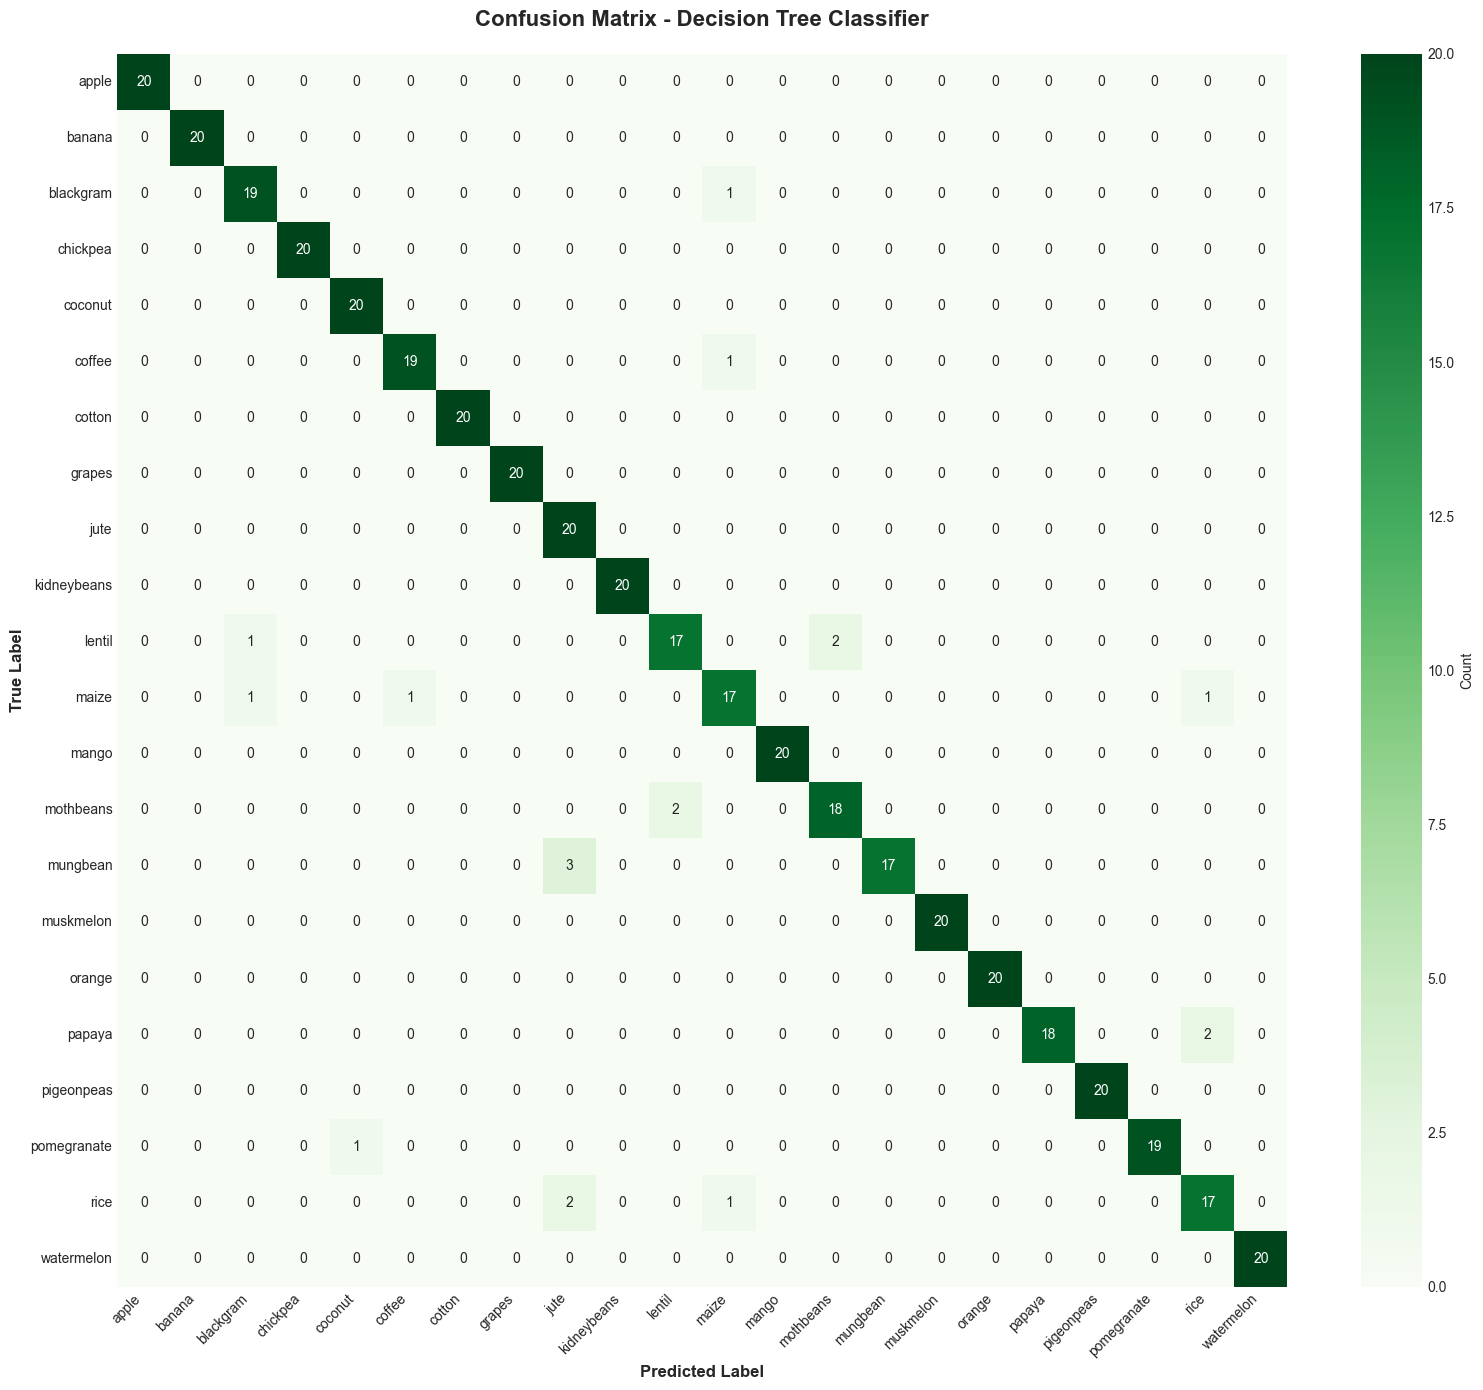

In [41]:
plt.figure(figsize=(16,14))
sns.heatmap(cm,annot=True,fmt="d",cmap="Greens",xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_,cbar_kws={"label":"Count"})

plt.title("Confusion Matrix - Decision Tree Classifier", fontsize=16,fontweight='bold',pad=20)
plt.xlabel("Predicted Label", fontsize=12,fontweight='bold')
plt.ylabel("True Label", fontsize=12,fontweight='bold')
plt.xticks(rotation=45,ha='right')
plt.yticks(rotation=0)

plt.tight_layout()
plt.savefig('../data/visualizations/29_decision_tree_confusion_matrix.png', dpi=300, bbox_inches='tight')
print("\nSaved: 29_decision_tree_confusion_matrix.png")
plt.show()

Normalized confusion matrix

In [42]:
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

Saved: 30_decision_tree_confusion_matrix_normalized.png


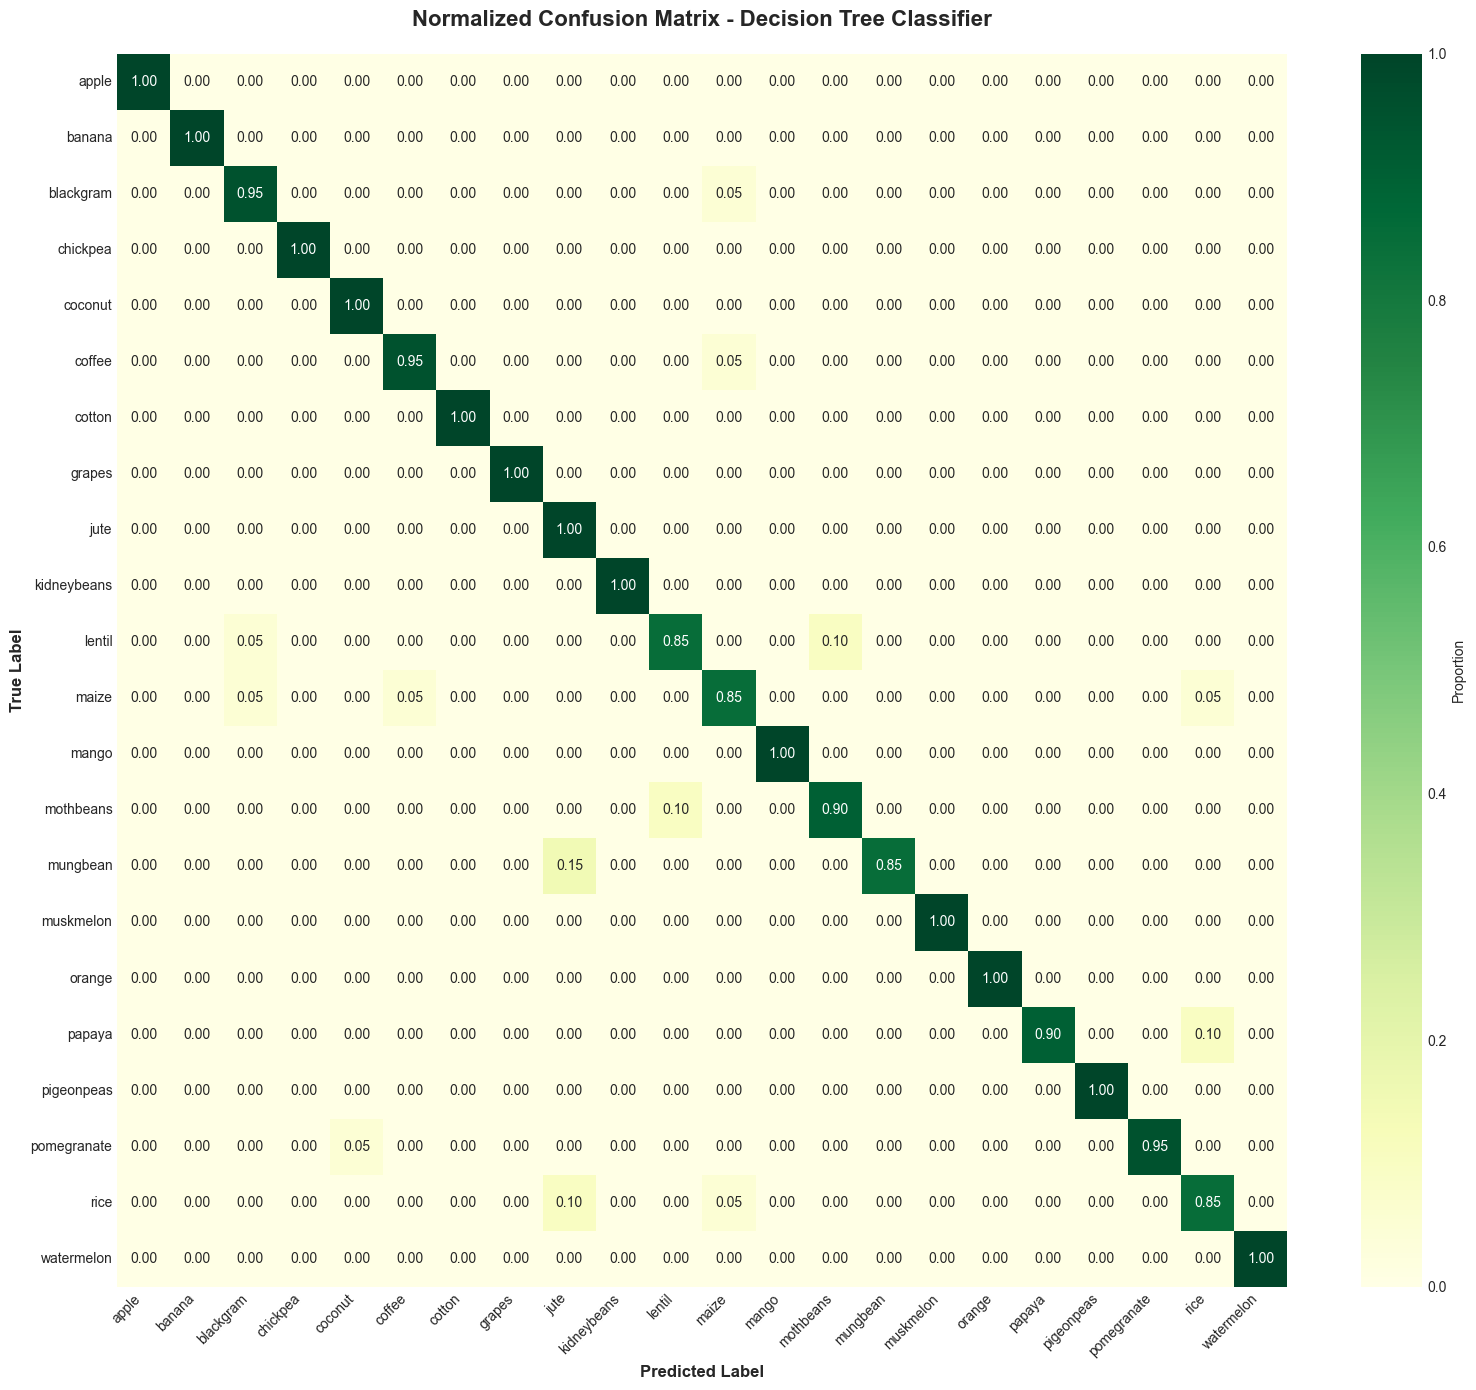

In [43]:
plt.figure(figsize=(16,14))
sns.heatmap(cm_normalized,annot=True,fmt=".2f",cmap="YlGn",xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_,cbar_kws={"label":"Proportion"})

plt.title("Normalized Confusion Matrix - Decision Tree Classifier", fontsize=16,fontweight='bold',pad=20)
plt.xlabel("Predicted Label", fontsize=12,fontweight='bold')
plt.ylabel("True Label", fontsize=12,fontweight='bold')
plt.xticks(rotation=45,ha='right')
plt.yticks(rotation=0)

plt.tight_layout()
plt.savefig('../data/visualizations/30_decision_tree_confusion_matrix_normalized.png', dpi=300, bbox_inches='tight')
print("Saved: 30_decision_tree_confusion_matrix_normalized.png")
plt.show()

# Feature Importance Analysis

In [44]:
feature_importances=dt_optimized.feature_importances_

In [45]:
feature_importance_df=pd.DataFrame({
    "Feature":feature_names,
    "Importance":feature_importances
}).sort_values(by="Importance", ascending=False)

In [46]:
print("Top 20 most important features:")
print(feature_importance_df.head(20).to_string(index=False))

Top 20 most important features:
                  Feature  Importance
                 humidity    0.149447
            climate_index    0.097473
        rainfall_per_temp    0.092499
                        P    0.080326
             P_to_K_ratio    0.053448
              NPK_product    0.050905
                        K    0.050028
                  NPK_sum    0.049346
       water_availability    0.049270
              N_dominance    0.045114
temp_humidity_interaction    0.043618
         N_ph_interaction    0.042126
           moisture_index    0.037040
         P_ph_interaction    0.036573
              P_dominance    0.030932
    resource_availability    0.024089
       water_stress_index    0.021524
     environmental_stress    0.010450
              K_dominance    0.008654
                       ph    0.008246


Visualize top 20 features


Saved: 31_decision_tree_feature_importance.png


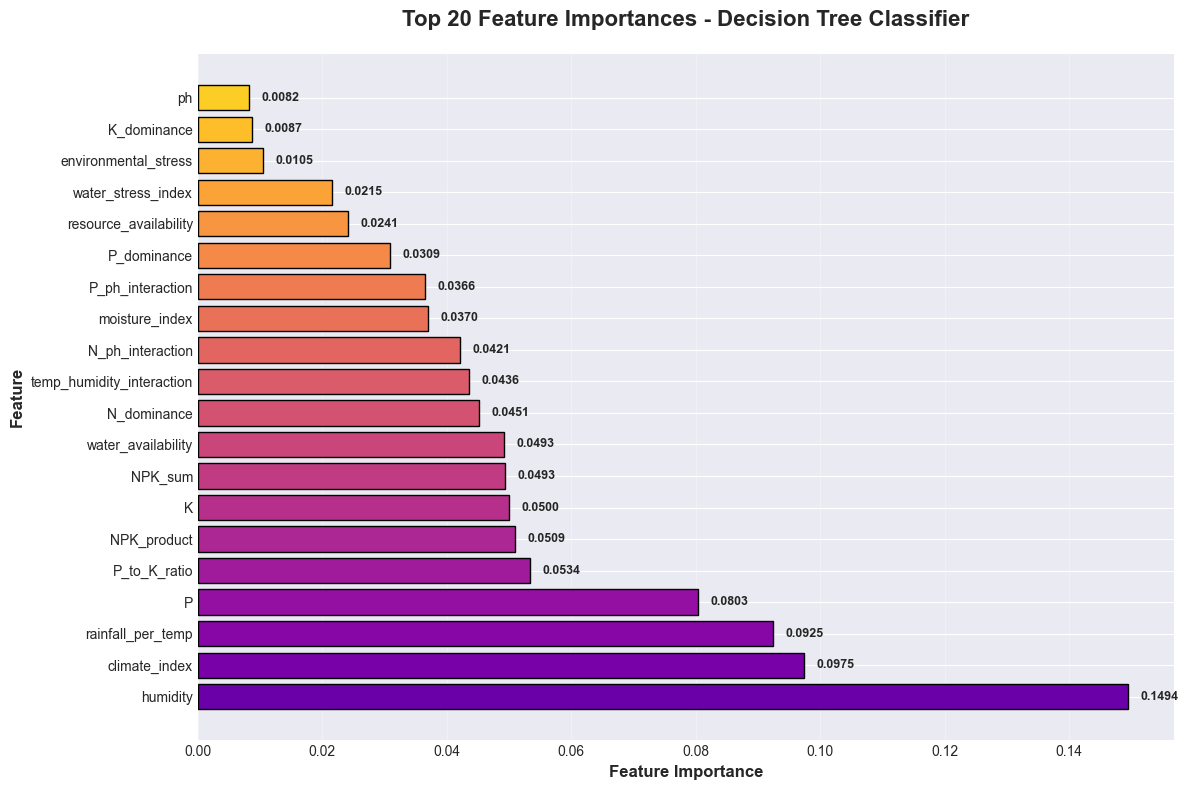

In [47]:
plt.figure(figsize=(12,8))
top_20_features=feature_importance_df.head(20)
colors=plt.cm.plasma(np.linspace(0.2,0.9,20))
bars = plt.barh(range(20), top_20_features['Importance'].values, color=colors, edgecolor='black')

plt.yticks(range(20), top_20_features['Feature'].values)
plt.xlabel("Feature Importance", fontsize=12,fontweight='bold')
plt.ylabel("Feature", fontsize=12,fontweight='bold')
plt.title("Top 20 Feature Importances - Decision Tree Classifier", fontsize=16,fontweight='bold',pad=20)
plt.grid(axis='x',alpha=0.3)

for i, val in enumerate(top_20_features['Importance'].values):
    plt.text(val + 0.002, i, f'{val:.4f}', va='center', fontweight='bold', fontsize=9)

plt.tight_layout()
plt.savefig('../data/visualizations/31_decision_tree_feature_importance.png', dpi=300, bbox_inches='tight')
print("\nSaved: 31_decision_tree_feature_importance.png")
plt.show()

In [48]:
feature_importance_df.to_csv('../data/results/decision_tree_feature_importance.csv', index=False)
print("Feature importance saved to: ../data/results/decision_tree_feature_importance.csv")

Feature importance saved to: ../data/results/decision_tree_feature_importance.csv


#  Visualize Decision Tree Structure (Simplified)

In [49]:
print("DECISION TREE STRUCTURE VISUALIZATION")

DECISION TREE STRUCTURE VISUALIZATION


Create a simplified tree for visualization (max depth 3)

In [50]:
dt_simple = DecisionTreeClassifier(
    criterion='gini',
    max_depth=3,
    min_samples_split=10,
    random_state=42
)

In [51]:
print("Training simplified tree (depth=3) for visualization")
dt_simple.fit(X_train, y_train)
print("Simplified tree trained!")

Training simplified tree (depth=3) for visualization
Simplified tree trained!


Visualize tree structure

Saved: 32_decision_tree_structure.png


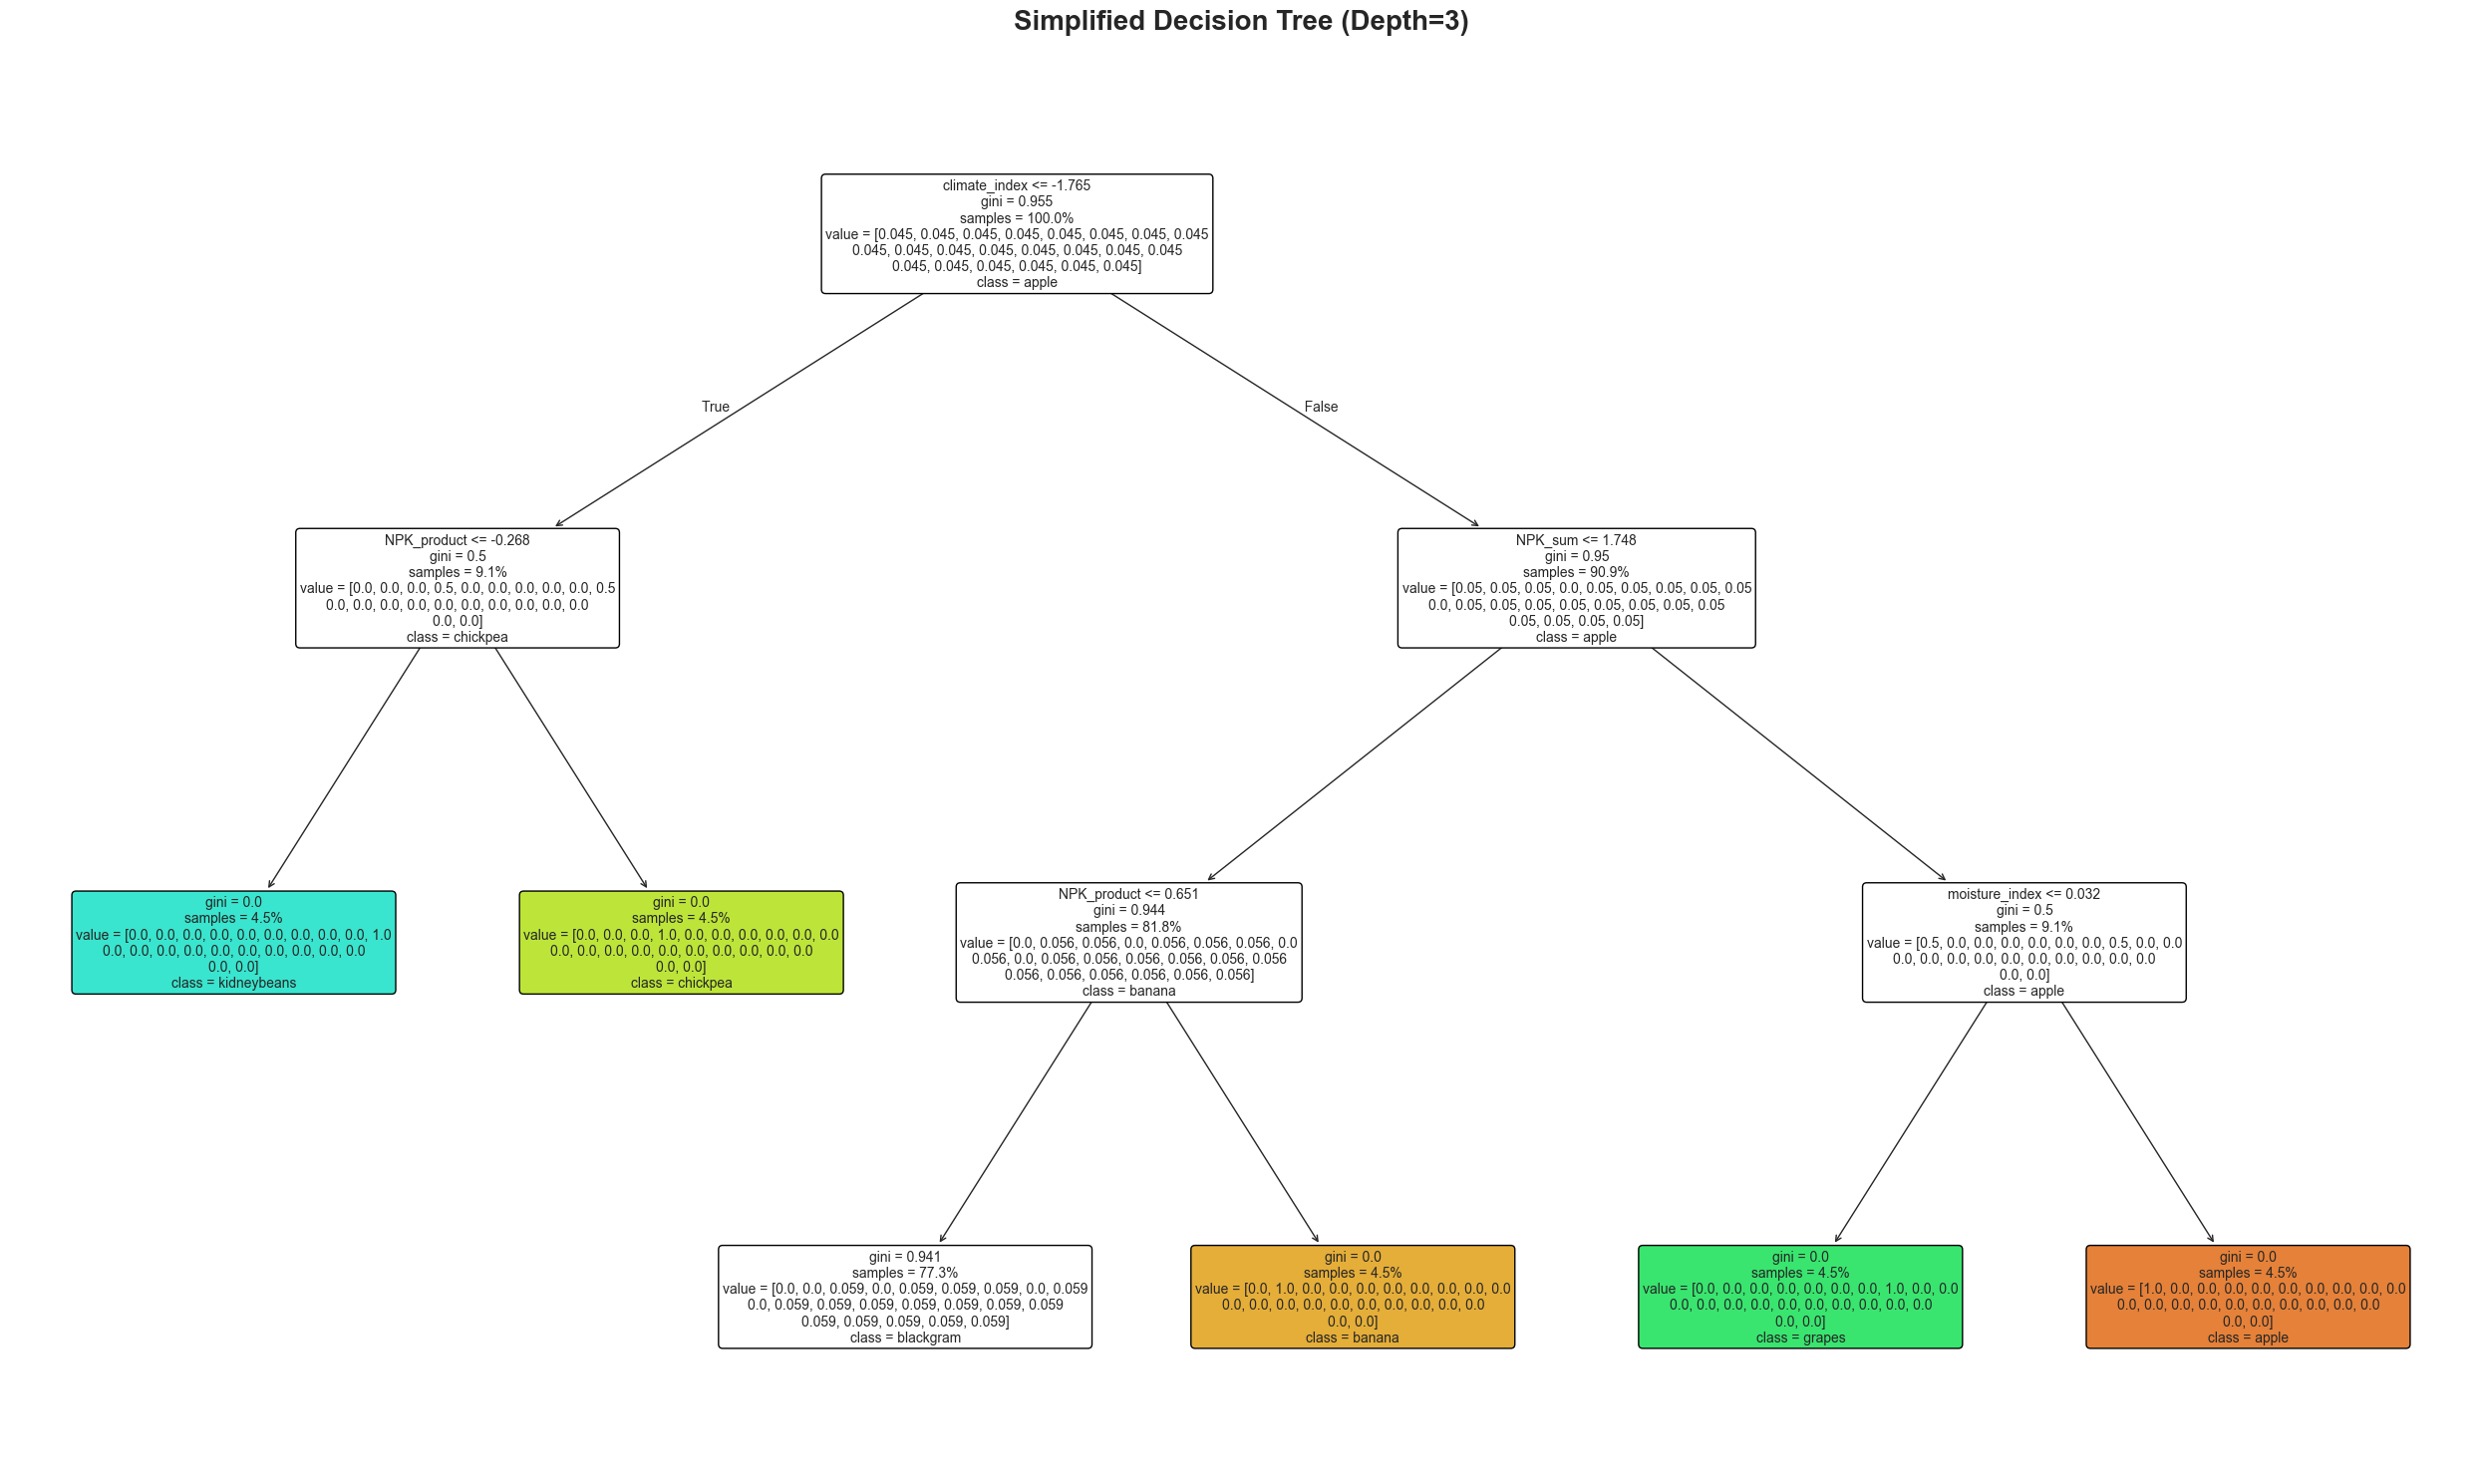

In [52]:
plt.figure(figsize=(25,15))
plot_tree(dt_simple,feature_names=feature_names,
          class_names=label_encoder.classes_,
          filled=True,
          rounded=True,
          fontsize=10,
          proportion=True
        )

plt.title("Simplified Decision Tree (Depth=3)", fontsize=20,fontweight='bold',pad=20)

plt.tight_layout()
plt.savefig('../data/visualizations/32_decision_tree_structure.png', dpi=300, bbox_inches='tight')
print("Saved: 32_decision_tree_structure.png")
plt.show()

# Per-Class Performance Analysis

In [53]:
print("PER-CLASS PERFORMANCE ANALYSIS")

PER-CLASS PERFORMANCE ANALYSIS


In [54]:
class_metrics = []
for i, crop in enumerate(label_encoder.classes_):
    class_metrics.append({
        'Crop': crop,
        'Precision': report_dict[crop]['precision'],
        'Recall': report_dict[crop]['recall'],
        'F1-Score': report_dict[crop]['f1-score'],
        'Support': report_dict[crop]['support']
    })

In [55]:
class_metrics_df = pd.DataFrame(class_metrics)
class_metrics_df = class_metrics_df.sort_values('F1-Score', ascending=False)

In [56]:
print("TOP 5 BEST PERFORMING CROPS:")
print(class_metrics_df.head(5).to_string(index=False))

print("TOP 5 WORST PERFORMING CROPS:")
print(class_metrics_df.tail(5).to_string(index=False))

TOP 5 BEST PERFORMING CROPS:
       Crop  Precision  Recall  F1-Score  Support
      apple        1.0     1.0       1.0     20.0
     banana        1.0     1.0       1.0     20.0
   chickpea        1.0     1.0       1.0     20.0
kidneybeans        1.0     1.0       1.0     20.0
     grapes        1.0     1.0       1.0     20.0
TOP 5 WORST PERFORMING CROPS:
     Crop  Precision  Recall  F1-Score  Support
mothbeans   0.900000    0.90  0.900000     20.0
     jute   0.800000    1.00  0.888889     20.0
   lentil   0.894737    0.85  0.871795     20.0
    maize   0.850000    0.85  0.850000     20.0
     rice   0.850000    0.85  0.850000     20.0



Saved: 33_decision_tree_per_class_performance.png


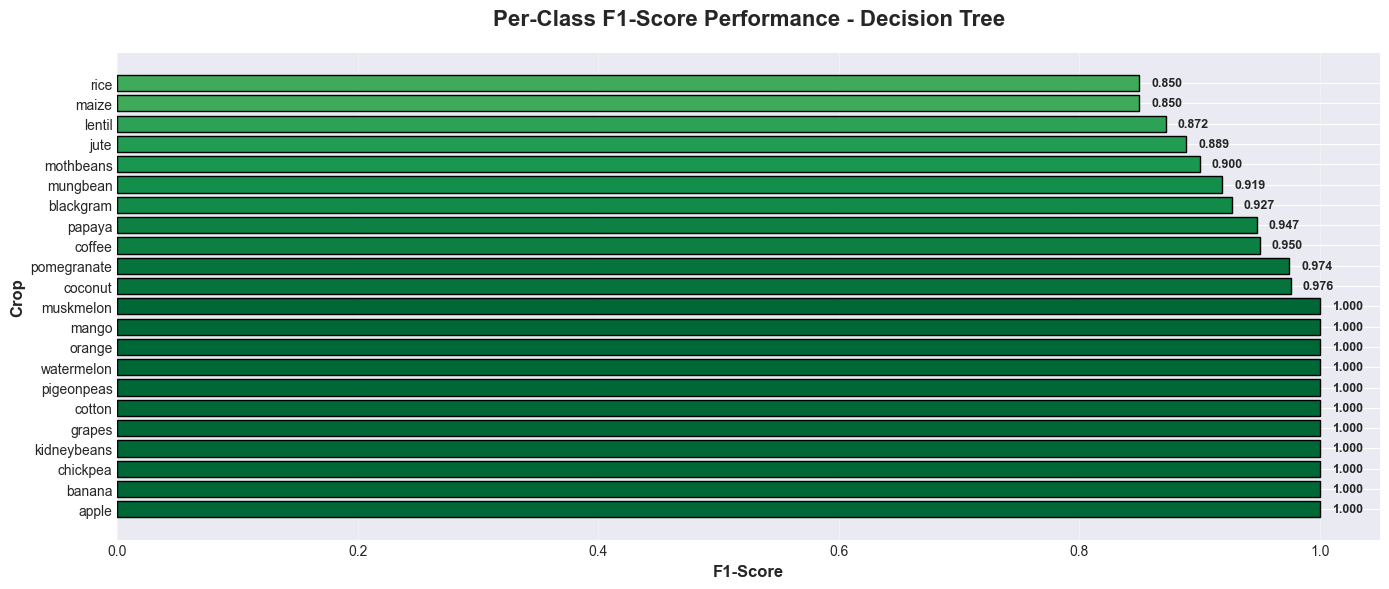

In [57]:
plt.figure(figsize=(14, 6))
colors = plt.cm.RdYlGn(class_metrics_df['F1-Score'])
bars = plt.barh(class_metrics_df['Crop'], class_metrics_df['F1-Score'], color=colors, edgecolor='black')

plt.xlabel('F1-Score', fontsize=12, fontweight='bold')
plt.ylabel('Crop', fontsize=12, fontweight='bold')
plt.title('Per-Class F1-Score Performance - Decision Tree', fontsize=16, fontweight='bold', pad=20)
plt.xlim(0, 1.05)
plt.grid(axis='x', alpha=0.3)

# Add value labels
for i, (crop, score) in enumerate(zip(class_metrics_df['Crop'], class_metrics_df['F1-Score'])):
    plt.text(score + 0.01, i, f'{score:.3f}', va='center', fontweight='bold', fontsize=9)

plt.tight_layout()
plt.savefig('../data/visualizations/33_decision_tree_per_class_performance.png', dpi=300, bbox_inches='tight')
print("\nSaved: 33_decision_tree_per_class_performance.png")
plt.show()

#  Tree Rules Export (Text Format)

In [58]:
tree_rules=export_text(dt_simple,
                       feature_names=feature_names,
                       max_depth=3,
                       spacing=2)

print("Simplified Decision Tree Rules (Depth=3):")
print(tree_rules[:2000]) #Print first 2000 characters

Simplified Decision Tree Rules (Depth=3):
|-- climate_index <= -1.76
|  |-- NPK_product <= -0.27
|  |  |-- class: 9
|  |-- NPK_product >  -0.27
|  |  |-- class: 3
|-- climate_index >  -1.76
|  |-- NPK_sum <= 1.75
|  |  |-- NPK_product <= 0.65
|  |  |  |-- class: 2
|  |  |-- NPK_product >  0.65
|  |  |  |-- class: 1
|  |-- NPK_sum >  1.75
|  |  |-- moisture_index <= 0.03
|  |  |  |-- class: 7
|  |  |-- moisture_index >  0.03
|  |  |  |-- class: 0



In [59]:
with open('../data/results/decision_tree_rules.txt', 'w') as f:
    f.write(tree_rules)
print("Full tree rules saved to: ../data/results/decision_tree_rules.txt")

Full tree rules saved to: ../data/results/decision_tree_rules.txt


# Save Model and Results

In [60]:
model_path = '../models/decision_tree_model.pkl'
with open(model_path, 'wb') as f:
    pickle.dump(dt_optimized, f)
print(f"Trained Decision Tree model saved to: {model_path}")

Trained Decision Tree model saved to: ../models/decision_tree_model.pkl


Save model performance summary

# Save model performance summary

In [61]:
model_summary = {
    'Model': ['Decision Tree'],
    'Train_Accuracy': [train_accuracy],
    'Test_Accuracy':[test_accuracy],
    'Train_Precision':[train_precision],
    'Test_Precision':[test_precision],
    'Train_Recall':[train_recall],
    'Test_Recall':[test_recall],
    'Train_F1':[train_f1],
    'Test_F1':[test_f1],
    'Training_Time_sec':[training_time],
    'Prediction_Time_ms':[test_pred_time/len(y_test)*1000],
    'Tree_Depth':[dt_optimized.get_depth()],
    'Num_Leaves':[dt_optimized.get_n_leaves()],
    'Overfitting_Gap': [accuracy_diff]
}

summary_df = pd.DataFrame(model_summary)
summary_df.to_csv('../data/results/decision_tree_summary.csv', index=False)
print("Performance summary saved to: ../data/results/decision_tree_summary.csv")

Performance summary saved to: ../data/results/decision_tree_summary.csv


In [62]:
predictions_df = pd.DataFrame({
    'True_Label_Encoded': y_test,
    'Predicted_Label_Encoded': y_test_pred,
    'True_Label': [label_encoder.classes_[i] for i in y_test],
    'Predicted_Label': [label_encoder.classes_[i] for i in y_test_pred],
    'Confidence': np.max(y_test_pred_proba, axis=1),
    'Correct': y_test == y_test_pred
})
predictions_df.to_csv('../data/results/decision_tree_predictions.csv', index=False)
print("Predictions saved to: ../data/results/decision_tree_predictions.csv")

Predictions saved to: ../data/results/decision_tree_predictions.csv


# Model Comparison Summary

In [63]:
# summary is saved ../data/results/model_comparison_lr_vs_dt.csv